In [1]:
import numpy as np
import cmath
import math
import matplotlib.pyplot as plt
import torch
from torch import nn
from scipy.optimize import curve_fit

# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
from scipy.signal import butter, cheby1, filtfilt
 
# data = np.load("example_data.npy")
 
# order = 3
# Wn = 4000  # in Hz
# btype = 'lowpass'
# fs = 50000  # in Hz
 
# b, a = butter(order, Wn, btype, fs = fs)
# data_butter = filtfilt(b, a, data)


In [2]:
def Smoothen(data):
    freq_range = data.shape[0]
    print(freq_range)
    fs = freq_range
    Wn = 10
    btype = 'lowpass'
    order = 3
    b, a = butter(order, Wn, btype, fs = fs)
    data_lowpass = filtfilt(b, a, data)
    return data_lowpass

def Process(data_0, data_1):
    data_3B_0 = np.loadtxt(data_0)
    data_3B_1 = np.loadtxt(data_1)
    data_3B_0_y = data_3B_0[:,1]
    data_3B_1_y = data_3B_1[:,1]
    freq_range = data_3B_0[:,0]
    data_3B_0_lowpass = Smoothen(data_3B_0_y)
    data_3B_1_lowpass = Smoothen(data_3B_1_y)
    ratio = data_3B_0_lowpass / data_3B_1_lowpass
    return freq_range, ratio, data_3B_0_lowpass, data_3B_1_lowpass, data_3B_0_y, data_3B_1_y
    plt.plot(freq_range, ratio)

25000
25000
25000
25000


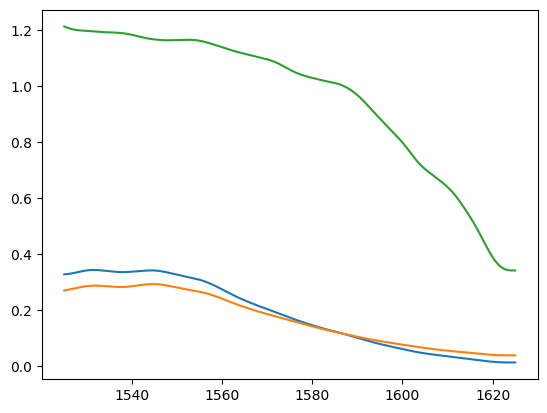

In [3]:
freq_range, ratio_3B, data_3B_0_y_lowpass, data_3B_1_y_lowpass, data_3B_0_y, data_3B_1_y = Process('3d_rewrite/3B/out0.dat', '3d_rewrite/3B/out1.dat')
freq_range, ratio_3C, data_3C_0_y_lowpass, data_3C_1_y_lowpass, data_3C_0_y, data_3C_1_y = Process('3d_rewrite/3C/out0.dat', '3d_rewrite/3C/out1.dat')
# plt.plot(freq_range, ratio_3B)
# freq_range, ratio_3C, data_3C_0_y_lowpass, data_3C_1_y_lowpass, data_3C_0_y, data_3C_1_y = Process('3C/out0.dat', '3C/out1.dat')
# plt.plot(freq_range, ratio_3C)



# freq_range, ratio_, data_0_y_lowpass, data_1_y_lowpass, data_0_y, data_1_y = Process('1C/out0.dat', '1C/out1.dat')
# data_1_y_lowpass_normalize = data_1_y_lowpass * ratio_3B
# # print(ratio.shape)
# # print(data_1_y_lowpass.shape)
# # print(data_1_y_lowpass_normalize)
# # print(freq_range)

# plt.plot(freq_range, data_0_y)
# plt.plot(freq_range, data_1_y)

plt.plot(freq_range, data_3C_0_y_lowpass)
plt.plot(freq_range, data_3C_1_y_lowpass)
plt.plot(freq_range, ratio_3C)





# plt.plot(freq_range, data_3C_0_y)
# plt.plot(freq_range, data_3C_1_y)

# data_3B_0 = np.loadtxt( '3B/out0.dat' )
# data_3B_1 = np.loadtxt( '3B/out1.dat' )
# data_3B_0_y = data_3B_0[:,1]
# data_3B_1_y = data_3B_1[:,1]
# freq_range = data_3B_0[:,0]
# data_3B_0_lowpass = Smoothen(data_3B_0_y)
# data_3B_1_lowpass = Smoothen(data_3B_1_y)
# plt.plot(freq_range, data_3B_0_lowpass)
# plt.plot(freq_range, data_3B_1_lowpass)

In [4]:
pos1 = np.where(freq_range == 1.600000000000000E+3)
print(pos1[0])

[18750]


25000
25000
25000
25000
25000
25000


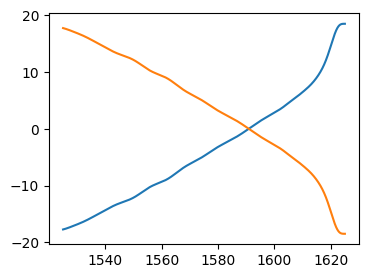

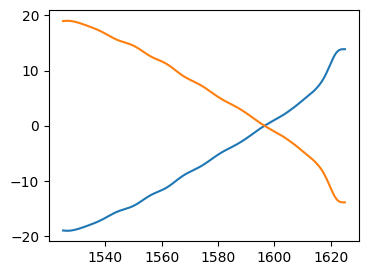

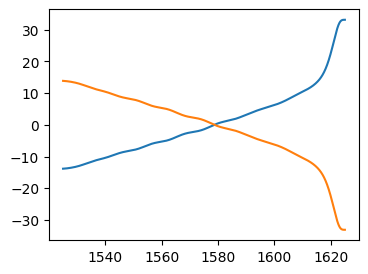

In [6]:
freq_range, ratio_, data_0_y_lowpass, data_1_y_lowpass, data_0_y, data_1_y = Process('3d_rewrite/2A/out0.dat', '3d_rewrite/2A/out1.dat')
data_1_y_lowpass_normalize = data_1_y_lowpass * ratio_3C
contrast_ratio = data_1_y_lowpass_normalize / (data_0_y_lowpass + data_1_y_lowpass_normalize)
contrast_ratio_bar = 1 - contrast_ratio
contrast_dB = np.log(data_1_y_lowpass_normalize / data_0_y_lowpass) * 10
contrast_dB_bar = np.log(data_0_y_lowpass / data_1_y_lowpass_normalize) * 10

plt.figure(figsize=(4,3))
# plt.plot(freq_range[:], data_1_y_lowpass_normalize[:])
# plt.plot(freq_range[:],data_0_y_lowpass[:])
plt.plot(freq_range[:], contrast_dB[:])
plt.plot(freq_range[:], contrast_dB_bar[:])

freq_range, ratio_, data_0_y_lowpass, data_1_y_lowpass, data_0_y, data_1_y = Process('3d_rewrite/2B/out0.dat', '3d_rewrite/2B/out1.dat')
data_1_y_lowpass_normalize = data_1_y_lowpass * ratio_3C
contrast_ratio = data_1_y_lowpass_normalize / (data_0_y_lowpass + data_1_y_lowpass_normalize)
contrast_ratio_bar = 1 - contrast_ratio
contrast_dB = np.log(data_1_y_lowpass_normalize / data_0_y_lowpass) * 10
contrast_dB_bar = np.log(data_0_y_lowpass / data_1_y_lowpass_normalize) * 10

plt.figure(figsize=(4,3))
# plt.plot(freq_range[:], contrast_ratio[:])
# plt.plot(freq_range[:], contrast_ratio_bar[:])
plt.plot(freq_range[:], contrast_dB[:])
plt.plot(freq_range[:], contrast_dB_bar[:])


freq_range, ratio_, data_0_y_lowpass, data_1_y_lowpass, data_0_y, data_1_y = Process('3d_rewrite/2C/out0.dat', '3d_rewrite/2C/out1.dat')
data_1_y_lowpass_normalize = data_1_y_lowpass * ratio_3C
contrast_ratio = data_1_y_lowpass_normalize / (data_0_y_lowpass + data_1_y_lowpass_normalize)
contrast_ratio_bar = 1 - contrast_ratio
contrast_dB = np.log(data_1_y_lowpass_normalize / data_0_y_lowpass) * 10
contrast_dB_bar = np.log(data_0_y_lowpass / data_1_y_lowpass_normalize) * 10

plt.figure(figsize=(4,3))
# plt.plot(freq_range[:], contrast_ratio[:])
# plt.plot(freq_range[:], contrast_ratio_bar[:])
plt.plot(freq_range[:], contrast_dB[:])
plt.plot(freq_range[:], contrast_dB_bar[:])

plt.show()

In [8]:
# freq_range, ratio_, data_0_y_lowpass, data_1_y_lowpass, data_0_y, data_1_y = Process('3d_rewrite/0B/out0.dat', '3d_rewrite/2B/out1.dat')
# data_1_y_lowpass_normalize = data_1_y_lowpass * ratio_3C
# contrast_ratio = data_1_y_lowpass_normalize / (data_0_y_lowpass + data_1_y_lowpass_normalize)
# contrast_ratio_bar = 1 - contrast_ratio
# contrast_dB = np.log(data_1_y_lowpass_normalize / data_0_y_lowpass) * 10
# contrast_dB_bar = np.log(data_0_y_lowpass / data_1_y_lowpass_normalize) * 10

# plt.figure(figsize=(4,3))
# # plt.plot(freq_range[:], contrast_ratio[:])
# # plt.plot(freq_range[:], contrast_ratio_bar[:])
# plt.plot(freq_range[:], contrast_dB[:])
# plt.plot(freq_range[:], contrast_dB_bar[:])


freq_range, ratio_, data_0_y_lowpass, data_1_y_lowpass, data_0_y, data_1_y = Process('3d_rewrite/0C/out0.dat', '3d_rewrite/0C/out1.dat')
data_1_y_lowpass_normalize = data_1_y_lowpass * ratio_3C
contrast_ratio = data_1_y_lowpass_normalize / (data_0_y_lowpass + data_1_y_lowpass_normalize)
contrast_ratio_bar = 1 - contrast_ratio
contrast_dB = np.log(data_1_y_lowpass_normalize / data_0_y_lowpass) * 10
contrast_dB_bar = np.log(data_0_y_lowpass / data_1_y_lowpass_normalize) * 10

plt.figure(figsize=(4,3))
# plt.plot(freq_range[:], contrast_ratio[:])
# plt.plot(freq_range[:], contrast_ratio_bar[:])
plt.plot(freq_range[:], contrast_dB[:])
plt.plot(freq_range[:], contrast_dB_bar[:])

freq_range, ratio_, data_0_y_lowpass, data_1_y_lowpass, data_0_y, data_1_y = Process('3d_rewrite/0A/out0.dat', '3d_rewrite/2A/out1.dat')
data_1_y_lowpass_normalize = data_1_y_lowpass * ratio_3C
contrast_ratio = data_1_y_lowpass_normalize / (data_0_y_lowpass + data_1_y_lowpass_normalize)
contrast_ratio_bar = 1 - contrast_ratio
contrast_dB = np.log(data_1_y_lowpass_normalize / data_0_y_lowpass) * 10
contrast_dB_bar = np.log(data_0_y_lowpass / data_1_y_lowpass_normalize) * 10

plt.figure(figsize=(4,3))
# plt.plot(freq_range[:], contrast_ratio[:])
# plt.plot(freq_range[:], contrast_ratio_bar[:])
plt.plot(freq_range[:], contrast_dB[:])
plt.plot(freq_range[:], contrast_dB_bar[:])

35000
25000


ValueError: operands could not be broadcast together with shapes (35000,) (25000,) 

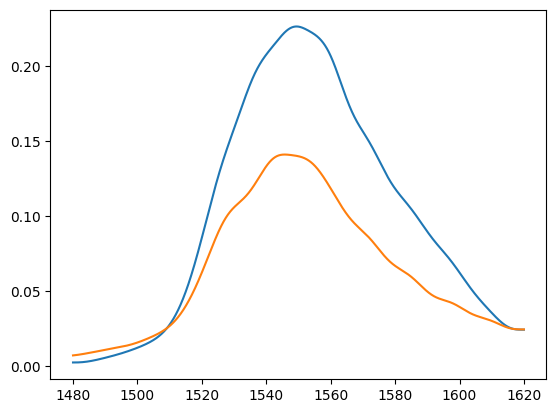

In [16]:
plt.plot(freq_range, data_0_y_lowpass)
plt.plot(freq_range, data_1_y_lowpass_normalize)

(array([], dtype=int64),)
(array([], dtype=int64),)
35000


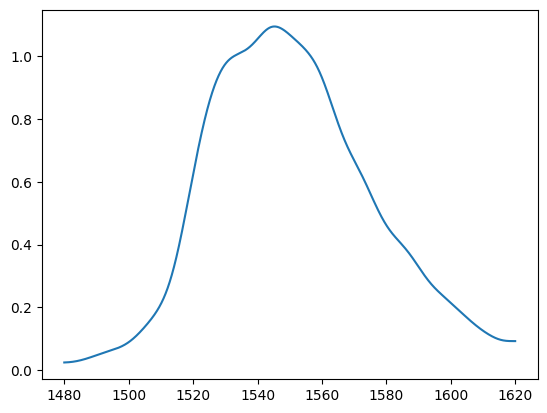

In [23]:
data_np = np.loadtxt( '3B/out0.dat' )
data_np = data_np
data_np_x = data_np[:,0]
data_np_y = data_np[:,1]
data_np_y_log = np.log(data_np_y)
pos1 = np.where(data_np_x == 1540000)
pos2 = np.where(data_np_x == 1560000)
print(pos1)
print(pos2)
# data_np_y_trc = data_np_y[:]
freq_range = data_np_x.shape[0]
print(freq_range)
fs = freq_range
Wn = 10
btype = 'lowpass'
order = 3
b, a = butter(order, Wn, btype, fs = fs)
data_np_y_lowpass = filtfilt(b, a, data_np_y)
# print(data_np.dtype)
# data = torch.from_numpy(data_np)
# print(data.shape)
# print(data[0, 0])
# print(data[0, 1])
# print(data[14999, 0])
# print(data[14999, 1])
plt.plot(data_np_x, data_np_y_lowpass)
